# Basic Convolution

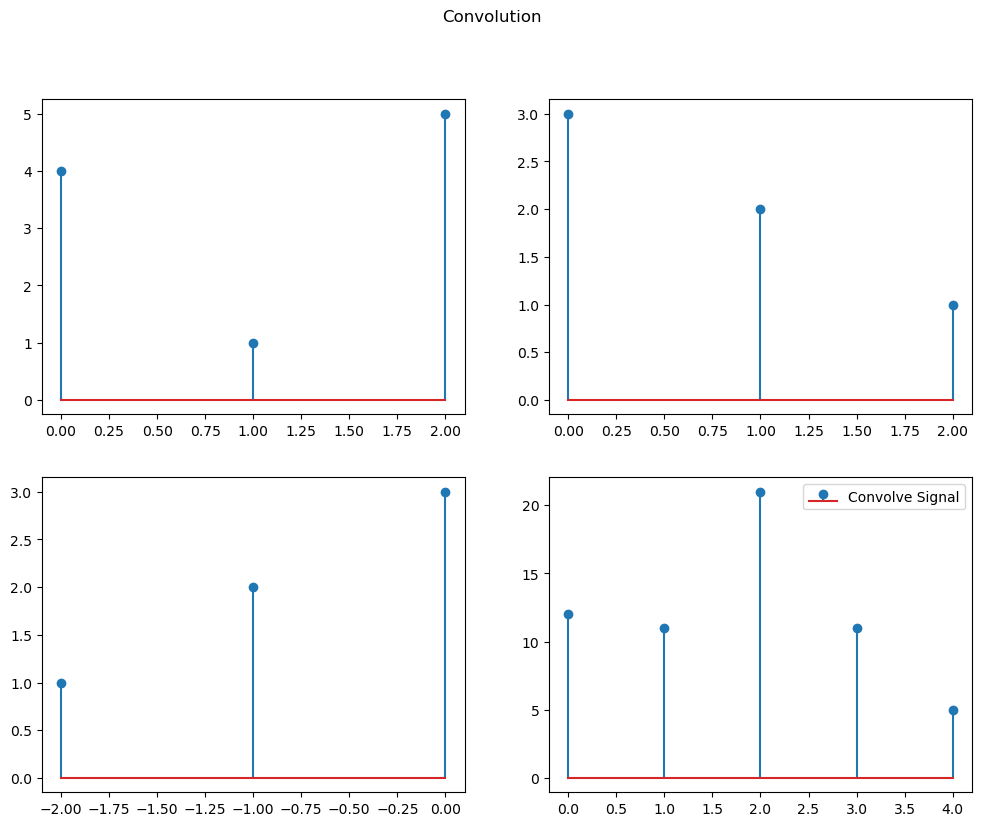

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([4,1,5])
n = np.array([0,1,2])

x2 = np.array([3,2,1])
n = np.array([0,1,2])
 # flip x2
f_x2 = x2[::-1]
n1 = np.array([-2,-1,0])

plt.figure(figsize= (12,9))
plt.suptitle("Convolution")
plt.subplot(2,2,1)
markerline, stemlines, baseline = plt.stem(n,x1)

plt.subplot(2,2,2)
markerline, stemlines, baseline = plt.stem(n,x2)

plt.subplot(2,2,3)
markerline, stemlines, baseline = plt.stem(n1,f_x2)

plt.subplot(2,2,4)
markerline, stemlines, baseline = plt.stem(np.convolve(x1,x2, mode = 'full'), label= "Convolve Signal")
plt.legend()
plt.show()

# Denoising

<function matplotlib.pyplot.show(close=None, block=None)>

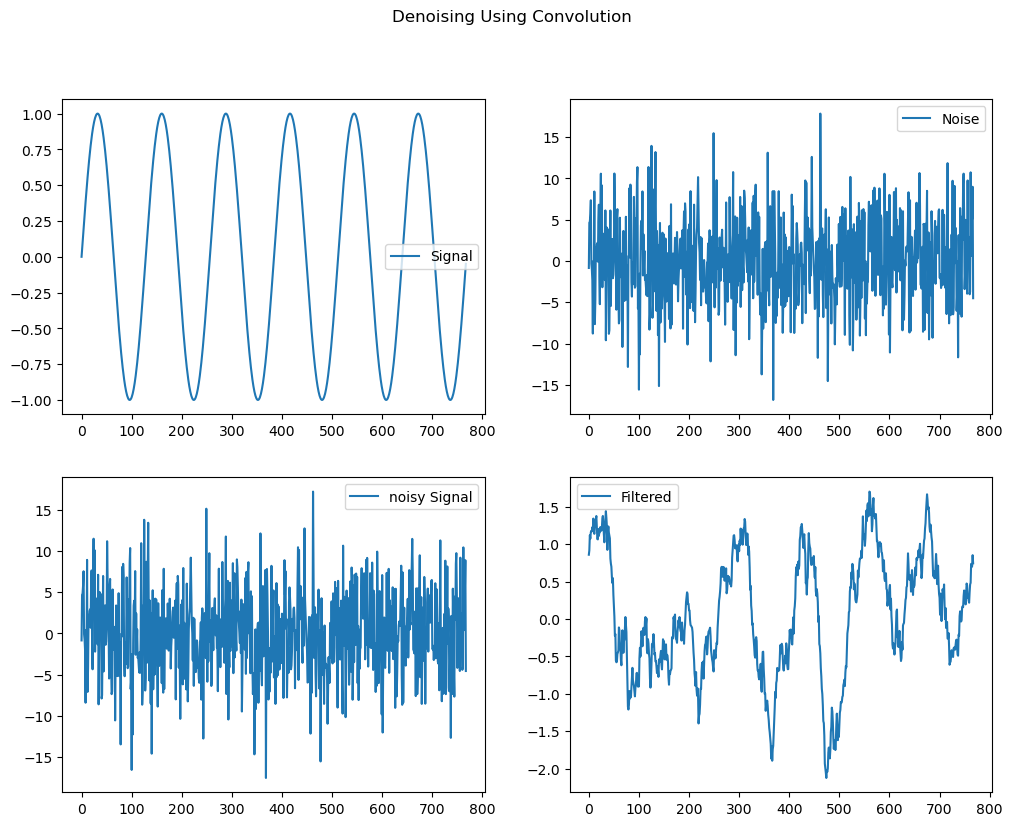

In [4]:
srate = 256
t = np.arange(0,3, 1/srate)
#signal
x = np.sin(2* np.pi* 2*t)
#noise
noise = 5*np.random.randn(len(t))
#noisySignal
ns = x+noise

#selecting filter
filter = np.ones(50)/50

#convolution
fs = np.convolve(ns,filter, mode='same')

plt.figure(figsize=(12,9))
plt.suptitle("Denoising Using Convolution")
plt.subplot(2,2,1)
plt.plot(x,label='Signal')
plt.legend()

plt.subplot(2,2,2)
plt.plot(noise,label='Noise')
plt.legend()

plt.subplot(2,2,3)
plt.plot(ns,label='noisy Signal')
plt.legend()


plt.subplot(2,2,4)
plt.plot(fs,label='Filtered')

plt.legend()
plt.show

**Double Denoise**

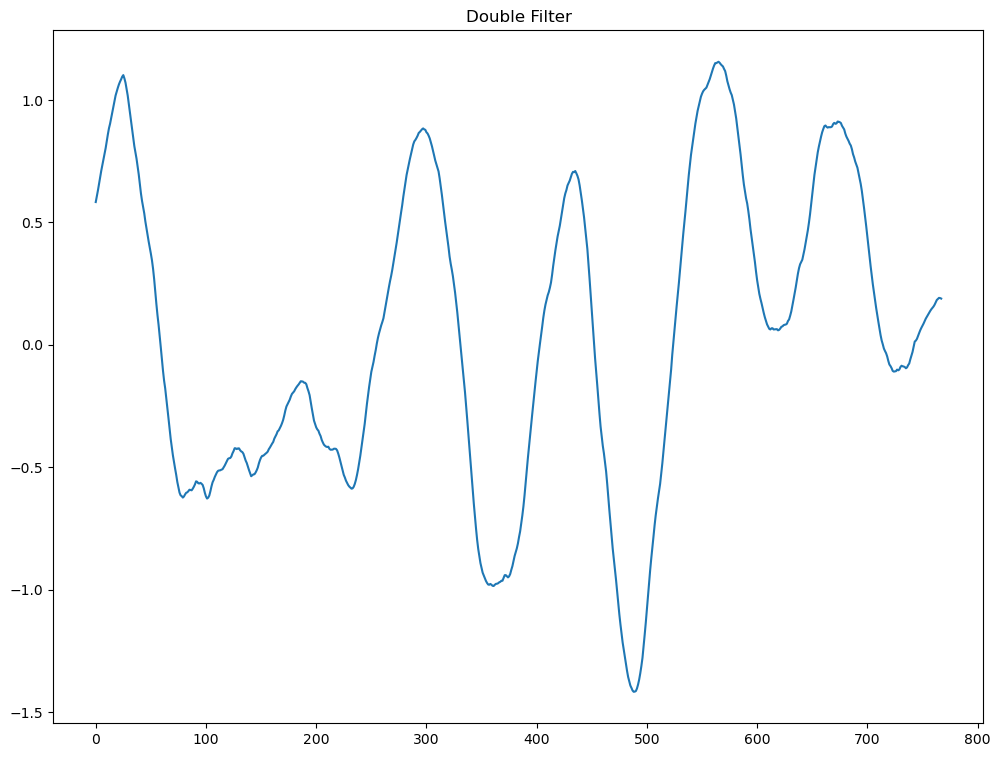

In [6]:
df = np.convolve(fs,filter, mode='same')
plt.figure(figsize=(12,9))
plt.title("Double Filter")
plt.plot(df)
plt.show()

# Convolution Using WEZNEY Method

In [9]:
from itertools import product


x = np.linspace(-5,10,10)
filter = np.ones(10)/10

def matrix(x, filter):
    x = np.array(x)
    y = np.array(filter)
    y = y.reshape(-1,1)
    M = x*y
    return M

convolutional_matrix = matrix(x,filter)
print(f"Convolutional Matrix: {convolutional_matrix}")

def convolution(a,b):
    N = len(a)
    M = len(b)
    result_length = N+M-1
    result = [0] * result_length

    for k in range(result_length):
        sum = 0
        terms = []
        for i in range(N):
            j = k-i
            if 0<=j<M:
                product = a[i]*b[j]
                sum += product
                terms.append(product)
            result[k] = sum
    return result

convolved_signal = np.array(convolution(x,filter))
print(f"Coonvolved Signal:\n{convolved_signal}")

Convolutional Matrix: [[-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.83333333  1.        ]
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
   0.5         0.66666667  0.